## Loading data

In [1]:
rm(list=ls())
bld=read.csv("bank-loan.csv",header = T,na.strings = c(" ","","NA"))
str(bld)
tail(bld)

'data.frame':	850 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : int  3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : int  17 10 15 15 2 5 20 12 3 0 ...
 $ address : int  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : int  176 31 55 120 28 25 67 38 19 25 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 10.2 30.6 3.6 24.4 19.7 ...
 $ creddebt: num  11.359 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : int  1 0 0 0 1 0 0 0 1 0 ...


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
845,23,1,3,4,13,3.1,0.045539,0.357461,NA
846,34,1,12,15,32,2.7,0.239328,0.624672,NA
847,32,2,12,11,116,5.7,4.026708,2.585292,NA
848,48,1,13,11,38,10.8,0.722304,3.381696,NA
849,35,2,1,11,24,7.8,0.417456,1.454544,NA
850,37,1,20,13,41,12.9,0.899130,4.389870,NA


## For input data

In [2]:
age = as.integer(readline(prompt="Enter age: "))
ed = as.integer(readline(prompt="Enter ed: "))
employ = as.integer(readline(prompt="Enter employ: "))
address = as.integer(readline(prompt="Enter address: "))
income = as.integer(readline(prompt="Enter income: "))
debtinc = as.double(readline(prompt="Enter debtinc: "))
creddebt = as.double(readline(prompt="Enter creddebt: "))
othdebt = as.double(readline(prompt="Enter othdebt: "))

# sample case values for default=1: 41	3	17	12	176	9.3	11.359392	5.008608	1

Enter age: 41
Enter ed: 3
Enter employ: 17
Enter address: 12
Enter income: 176
Enter debtinc: 9.3
Enter creddebt: 11.359392
Enter othdebt: 5.008


In [3]:
de <- list(age=age, ed=ed, employ=employ, address=address, income=income, debtinc=debtinc, creddebt=creddebt, othdebt=othdebt, default="NA")
bld = rbind(bld,de, stringsAsFactors=FALSE)
bld$default=as.integer(bld$default)
str(bld)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : int  3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : int  17 10 15 15 2 5 20 12 3 0 ...
 $ address : int  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : int  176 31 55 120 28 25 67 38 19 25 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 10.2 30.6 3.6 24.4 19.7 ...
 $ creddebt: num  11.359 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : int  1 0 0 0 1 0 0 0 1 0 ...


## Loading Packages

In [4]:
x=c("ggplot2","corrgram","DMwR","caret","randomForest","unbalanced","C50","inTrees",
    "dummies","e1071","Information","MASS","rpart","gbm","ROSE","sampling","RRF")
lapply(x,require,character.only = TRUE)
rm(x)

Loading required package: ggplot2

Loading required package: corrgram

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Loading required package: DMwR

Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:corrgram':

    panel.fill


Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: caret

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loading required package: unbalanced

Loading required package: mlr

Loading required package: ParamHelpers

'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).


Attaching package: 'mlr'




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

In [5]:
names(bld)
sum(is.na(bld$default))
bld$default = as.factor(bld$default)

[1] "age"      "ed"       "employ"   "address"  "income"   "debtinc"  "creddebt"
[8] "othdebt"  "default"

[1] 151

In [6]:
bld = knnImputation(bld ,k=3)
str(bld)

'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : int  3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : int  17 10 15 15 2 5 20 12 3 0 ...
 $ address : int  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : int  176 31 55 120 28 25 67 38 19 25 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 10.2 30.6 3.6 24.4 19.7 ...
 $ creddebt: num  11.359 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


In [7]:
bld$ed = as.factor(bld$ed)
str(bld)

'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : int  17 10 15 15 2 5 20 12 3 0 ...
 $ address : int  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : int  176 31 55 120 28 25 67 38 19 25 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 10.2 30.6 3.6 24.4 19.7 ...
 $ creddebt: num  11.359 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


[1] "age"      "employ"   "address"  "income"   "debtinc"  "creddebt" "othdebt"

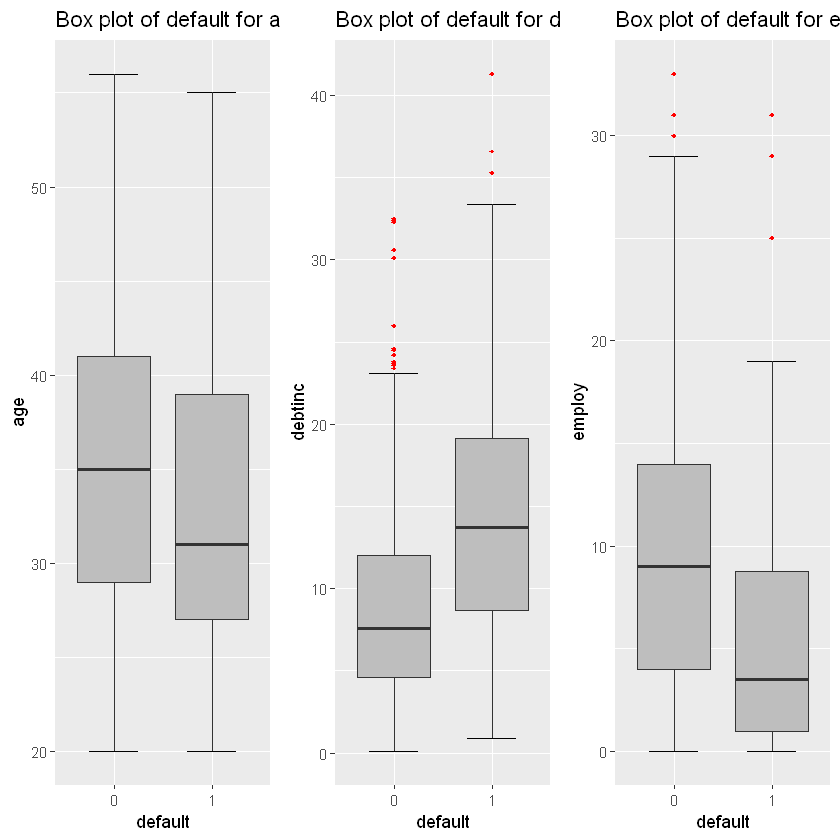

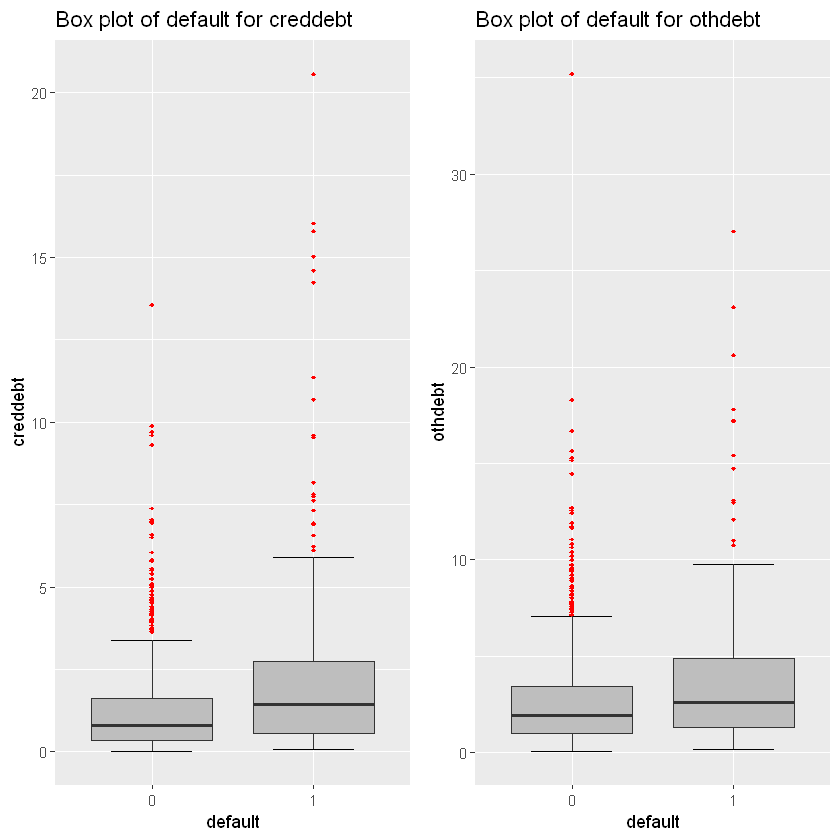

In [8]:
#(1).Box plot

numeric_index = sapply(bld ,is.numeric)
numeric_data = bld[,numeric_index]
cnames = colnames(numeric_data)
cnames
for(i in 1:length(cnames))
{
  assign(paste0("gn",i), ggplot(aes_string(y = (cnames[i]), x = "default"), data = subset(bld))+
           stat_boxplot(geom = "errorbar" , width = 0.5)+
           geom_boxplot(outlier.color="red",fill ="grey",outlier.shape = 18,
                        outlier.size=1,notch=FALSE)+
           theme(legend.position="bottom")+
           labs(y=cnames[i],x="default")+
           ggtitle(paste("Box plot of default for",cnames[i])))        
}

#Plotting plots together
#fridExtra is library name
gridExtra::grid.arrange(gn1,gn5,gn2,ncol=3)
gridExtra::grid.arrange(gn6,gn7,ncol=2)
# gridExtra::grid.arrange(gn8,gn9,ncol=2)


## Outlier Analysis

In [9]:
numeric_index = sapply(bld ,is.numeric)

numeric_data = bld[,numeric_index]
cnames = colnames(numeric_data)

for(i in cnames)
{
  print(i)
  val = bld[,i][bld[,i] %in% boxplot.stats(bld[,i])$out]
  
  # Put NA in the place of outliers and Impute.    
  bld[,i][bld[,i] %in% val] = NA    
  
  # Remove the outliers.
#   bld = bld[which(!bld[,i] %in% val),]
  
} 


bld = knnImputation(bld, k = 3)
str(bld)
sum(is.na(bld))
# levels(bld$ed)
head(bld)

[1] "age"
[1] "employ"
[1] "address"
[1] "income"
[1] "debtinc"
[1] "creddebt"
[1] "othdebt"
'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : num  17 10 15 15 2 5 20 12 3 0 ...
 $ address : num  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : num  63.9 31 55 58 28 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 ...
 $ creddebt: num  0.687 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


[1] 0

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,41,3,17,12,63.9349,9.3,0.6873045,5.008608,1
2,27,1,10,6,31.0000,17.3,1.3622020,4.000798,0
3,40,1,15,14,55.0000,5.5,0.8560750,2.168925,0
4,41,1,15,14,57.9917,2.9,2.6587200,0.821280,0
5,24,2,2,0,28.0000,17.3,1.7874360,3.056564,1
6,41,2,5,5,25.0000,10.2,0.3927000,2.157300,0


In [10]:
str(bld)

'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : num  17 10 15 15 2 5 20 12 3 0 ...
 $ address : num  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : num  63.9 31 55 58 28 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 ...
 $ creddebt: num  0.687 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


In [11]:
d=which(bld$employ >= 20)
# d # returns indexes
count = 0
for (x in d)
{
    if (bld[x,'default']==1)
        count= count +1
#         cat(x,bld[x,'default'],"\n")    
}
sum(bld$employ >= 20)
count
# bld <- bld[-c(d), ]
# for (x in d)
# {
#     bld=bld[-x,]
# }
str(bld)

head(bld)

[1] 51

[1] 1

'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : num  17 10 15 15 2 5 20 12 3 0 ...
 $ address : num  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : num  63.9 31 55 58 28 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 ...
 $ creddebt: num  0.687 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,41,3,17,12,63.9349,9.3,0.6873045,5.008608,1
2,27,1,10,6,31.0000,17.3,1.3622020,4.000798,0
3,40,1,15,14,55.0000,5.5,0.8560750,2.168925,0
4,41,1,15,14,57.9917,2.9,2.6587200,0.821280,0
5,24,2,2,0,28.0000,17.3,1.7874360,3.056564,1
6,41,2,5,5,25.0000,10.2,0.3927000,2.157300,0


## For Feature Scaling

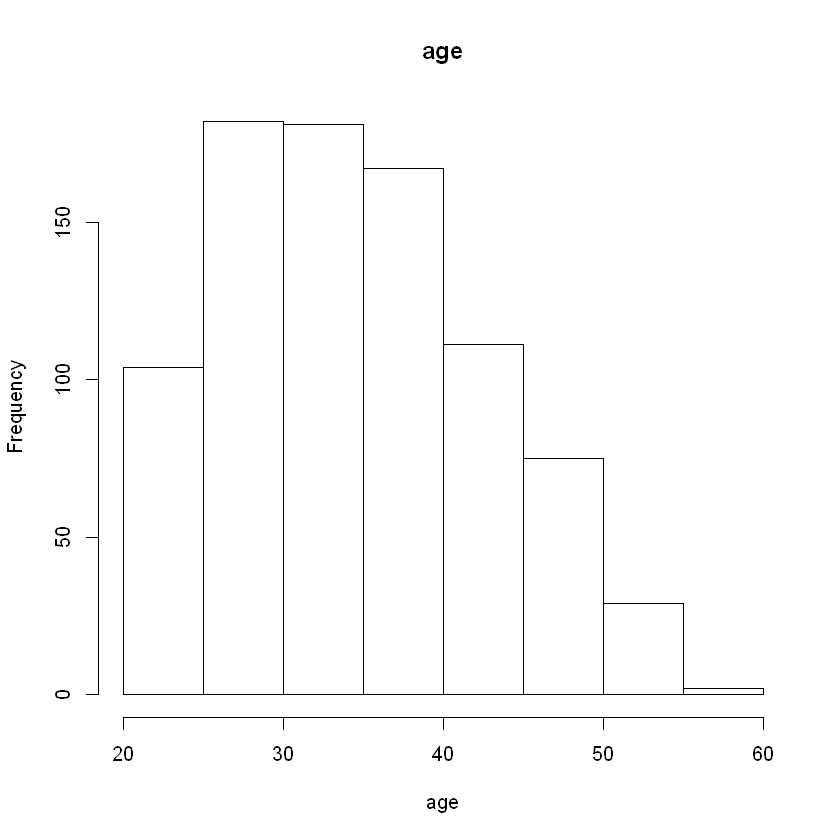

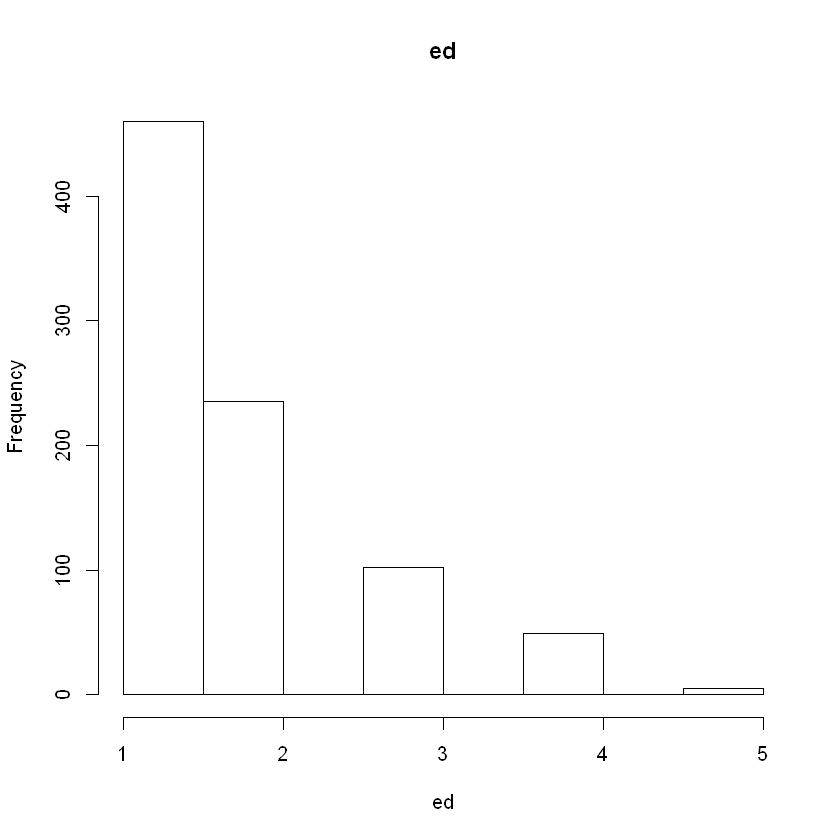

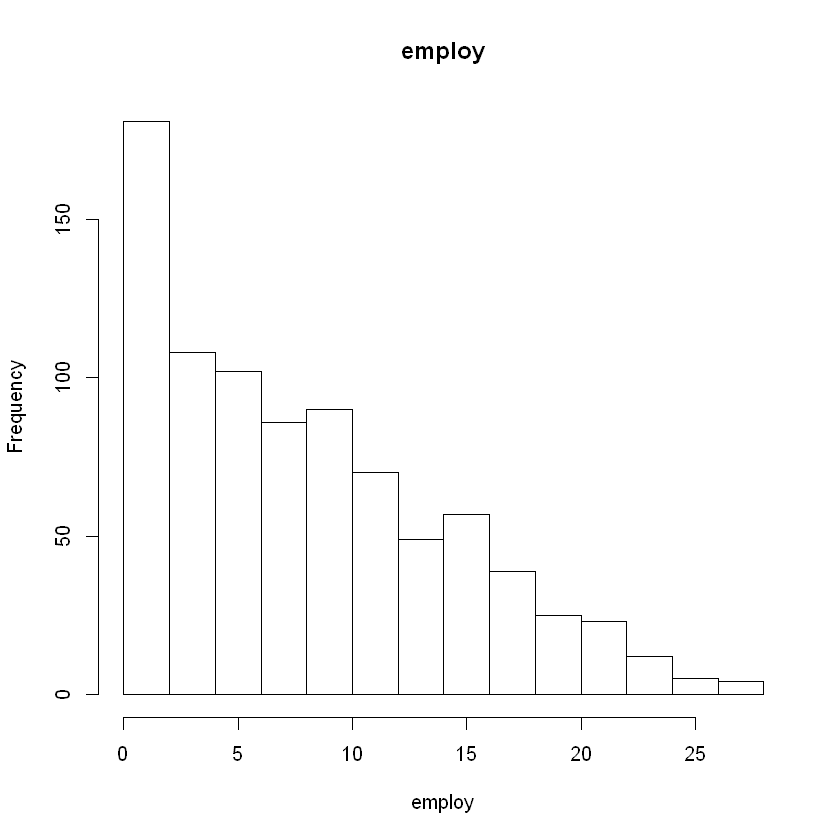

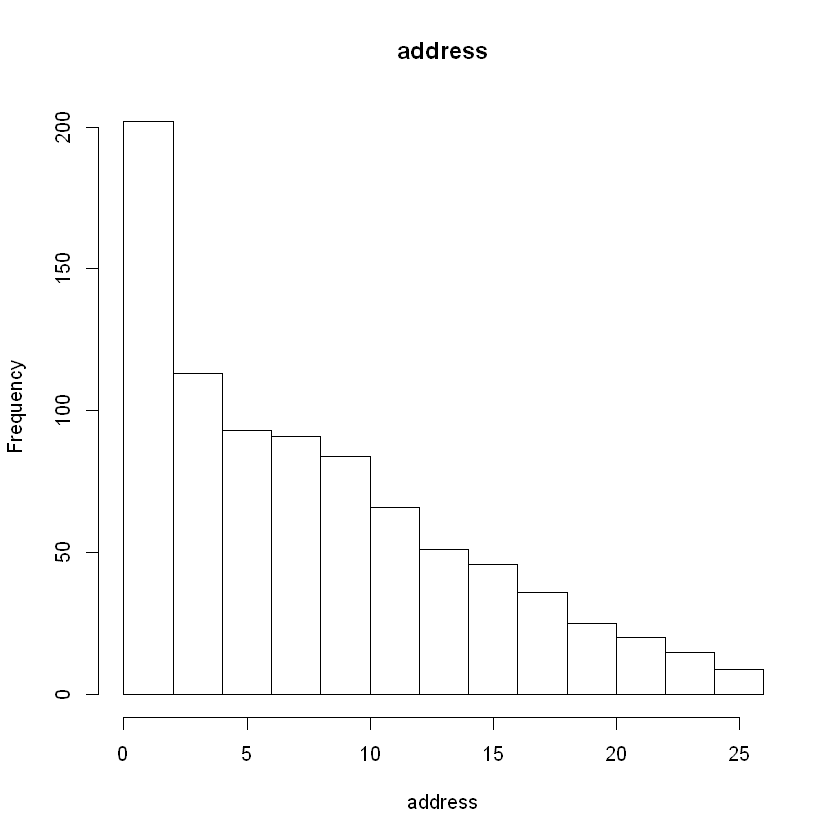

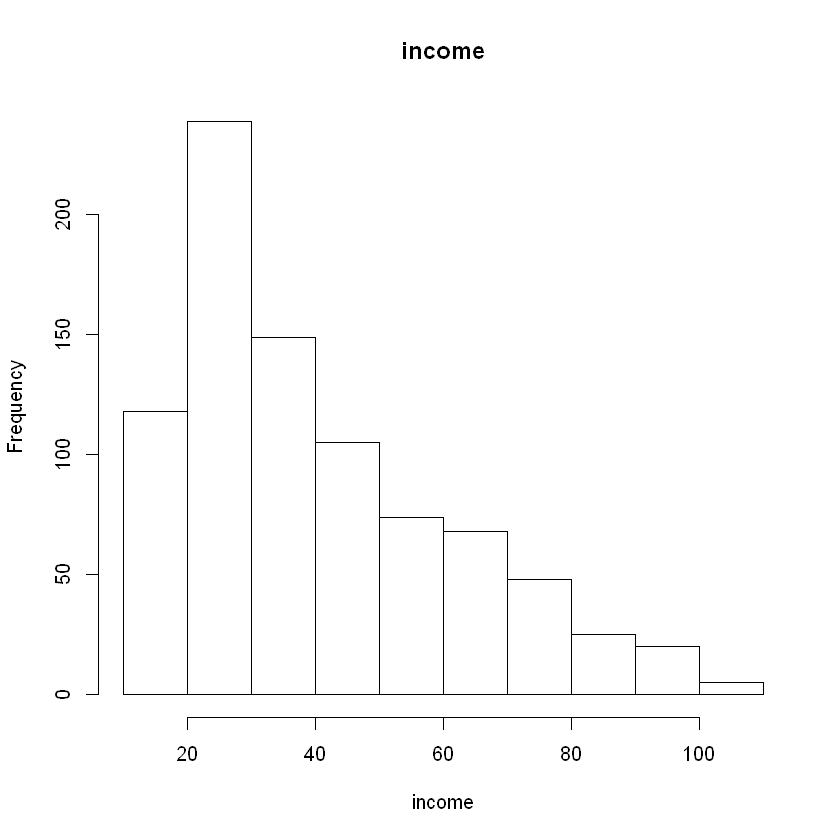

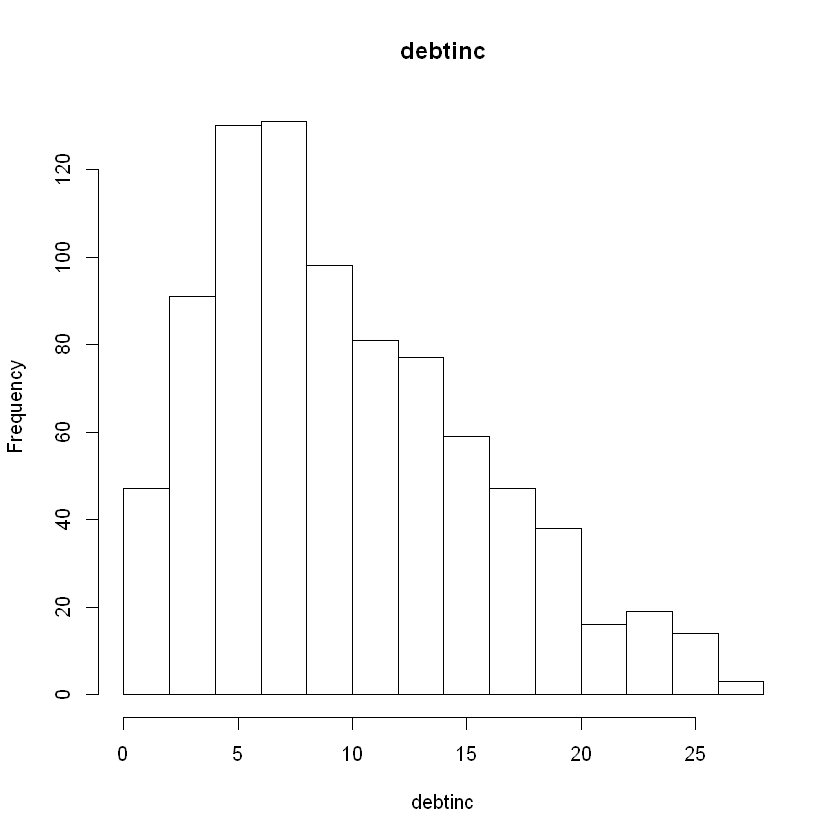

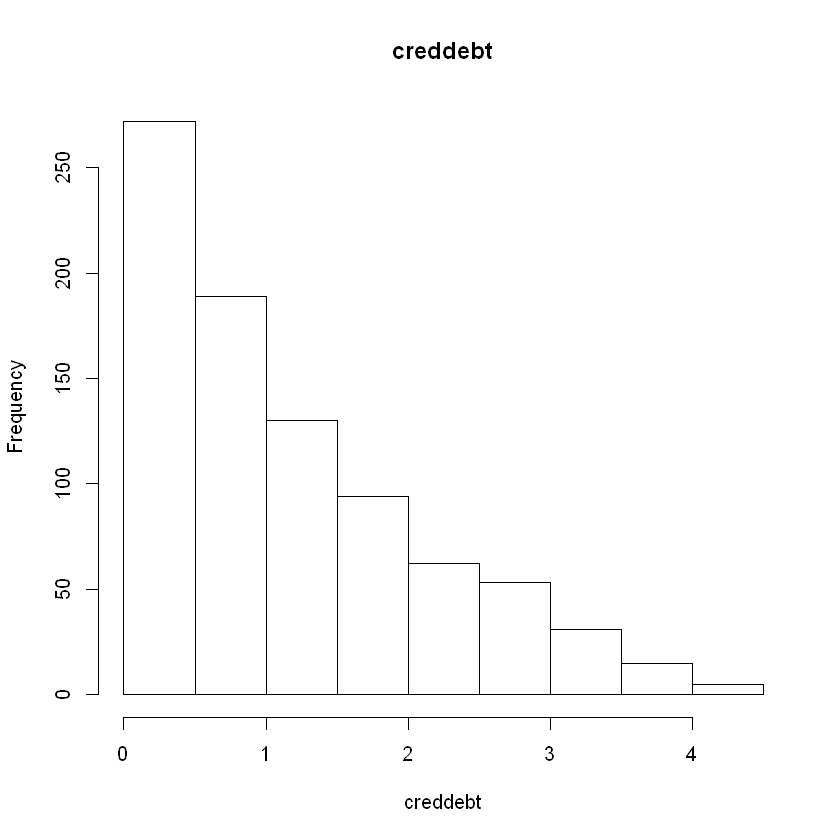

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,41,3,17,12,63.9349,9.3,0.6873045,5.008608,1
2,27,1,10,6,31.0000,17.3,1.3622020,4.000798,0
3,40,1,15,14,55.0000,5.5,0.8560750,2.168925,0
4,41,1,15,14,57.9917,2.9,2.6587200,0.821280,0
5,24,2,2,0,28.0000,17.3,1.7874360,3.056564,1
6,41,2,5,5,25.0000,10.2,0.3927000,2.157300,0


'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : num  17 10 15 15 2 5 20 12 3 0 ...
 $ address : num  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : num  63.9 31 55 58 28 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 ...
 $ creddebt: num  0.687 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


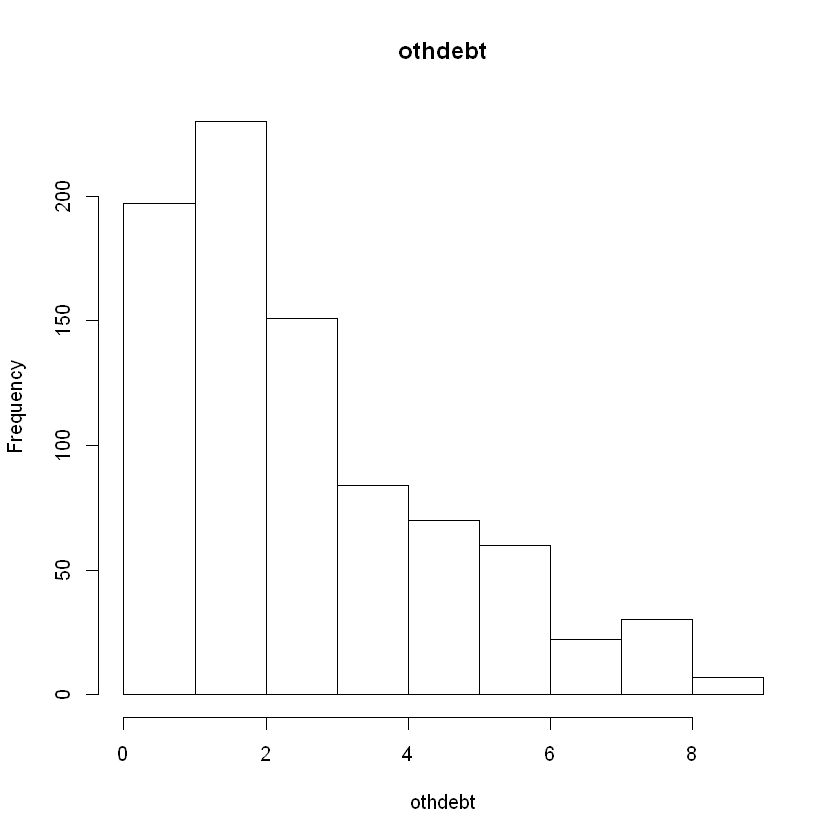

In [12]:
# Histograms to check how the data is spreaded.
bld$ed=as.numeric(bld$ed)

cols=c('age','ed','employ','address','income','debtinc','creddebt','othdebt')
for(i in 1:(length(cols)))
{
    hist(bld[,i], xlab = cols[i],main = cols[i])
}    

bld$ed=as.factor(bld$ed)
head(bld)
str(bld)

In [13]:
bld[1:83,'ed']
str(bld)

[1] 3 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 3 1 1 1 1 2 4 2 1 2 3 1 1 3 1 1 2 2 2
[39] 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 3 2 1 1 2 3 3 1 1 1 2 2 2 2 1 2 1 2 2 1 4 1 1
[77] 1 1 1 1 1 1 1
Levels: 1 2 3 4 5

'data.frame':	851 obs. of  9 variables:
 $ age     : int  41 27 40 41 24 41 39 43 24 36 ...
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : num  17 10 15 15 2 5 20 12 3 0 ...
 $ address : num  12 6 14 14 0 5 9 11 4 13 ...
 $ income  : num  63.9 31 55 58 28 ...
 $ debtinc : num  9.3 17.3 5.5 2.9 17.3 ...
 $ creddebt: num  0.687 1.362 0.856 2.659 1.787 ...
 $ othdebt : num  5.009 4.001 2.169 0.821 3.057 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


In [14]:
cols=c('age','employ','address','income','debtinc','creddebt','othdebt')
# Saving the continuous variable names.

# bld$ed = as.factor(bld$ed)
# bld$default = as.factor(bld$default)

# Normalisation
# for(i in cols)
# {
#   print(i)
#   bld[,i] = (bld[,i] - min(bld[,i]))/
#                                 (max(bld[,i]) - min(bld[,i]))
# }
#Above- Converting of variables in normalized variables.
# Standardisation(Apply it when, the data is following the normality pattern)
for(i in cols) 
{
  print(i)
  bld[,i] = (bld[,i] - mean(bld[,i]))/
                                sd(bld[,i])  
}
head(bld)

[1] "age"
[1] "employ"
[1] "address"
[1] "income"
[1] "debtinc"
[1] "creddebt"
[1] "othdebt"


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.7418019,3,1.3519224,0.6212305,1.1007367,-0.07736944,-0.4959268,1.2654642,1
2,-0.9996420,1,0.2559313,-0.3275400,-0.4677743,1.28070300,0.2060214,0.7465484,0
3,0.6174131,1,1.0387821,0.9374874,0.6752159,-0.72245384,-0.3203918,-0.1966729,0
4,0.7418019,1,1.0387821,0.9374874,0.8176942,-1.16382738,1.5545054,-0.8905678,0
5,-1.3728086,2,-0.9966301,-1.2763106,-0.6106480,1.28070300,0.6482993,0.2603676,1
6,0.7418019,2,-0.5269196,-0.4856684,-0.7535218,0.07541371,-0.8023394,-0.2026585,0


## Correlation Analysis

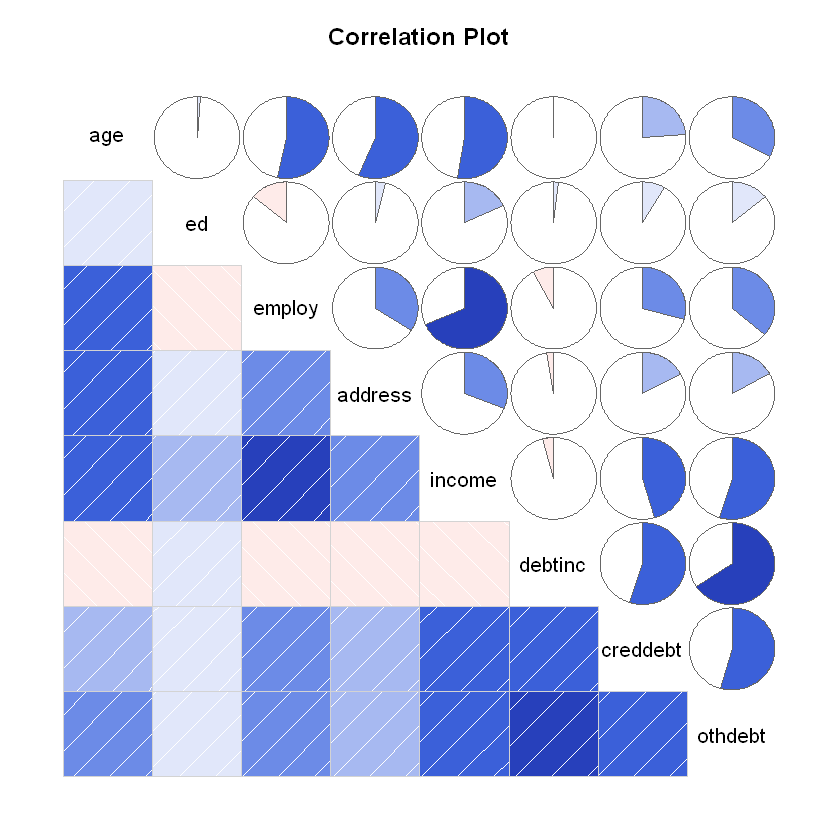

In [15]:
###Correlation plot
#Extreme Blue:highly positively correlated.
#Extreme Red :highly negatively correlated. 
# Check co-orelation between variables
bld$ed=as.numeric(bld$ed)
numeric_index = sapply(bld ,is.numeric)

# numeric_data = bld[,numeric_index]
# cnames = colnames(numeric_data)


corrgram(bld[,numeric_index],order = F,upper.panel=panel.pie,text.panel = panel.txt,
         main = "Correlation Plot")

# bld = subset(bld, select = -c(debtinc))
bld = subset(bld, select = -c(debtinc, age))
# bld = subset(bld, select = -c(income, age, othdebt))

# numeric_data
bld$ed=as.factor(bld$ed)

## Collecting Input data after processing

In [16]:
input_data = bld[851,]
input_data
bld = bld[-c(851),]
str(bld)

,ed,employ,address,income,creddebt,othdebt,default
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
851,3,1.351922,0.6212305,1.100735,-0.4958783,1.265151,1


'data.frame':	850 obs. of  7 variables:
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 1 2 2 1 1 1 1 ...
 $ employ  : num  1.352 0.256 1.039 1.039 -0.997 ...
 $ address : num  0.621 -0.328 0.937 0.937 -1.276 ...
 $ income  : num  1.101 -0.468 0.675 0.818 -0.611 ...
 $ creddebt: num  -0.496 0.206 -0.32 1.555 0.648 ...
 $ othdebt : num  1.265 0.747 -0.197 -0.891 0.26 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 2 1 ...


In [17]:
# Dividing data into train and test using stratified sampling method.(Since, our target variable "default" is binary classification.(Yes or no)).

# library(DataCombine)
# set.seed(1234)

set.seed(1234)
train.index = createDataPartition(bld$default, p = .80, list = FALSE)
# Above- list= false(we don't want repetitive observations in the training data,
# responded =0.80(80% of observations in marketing_train),the func createData... will return indexes of the observations)
train = bld[train.index,]
test = bld[-train.index,]
str(train)
str(test)
bld

'data.frame':	681 obs. of  7 variables:
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 3 1 1 2 2 1 1 1 1 1 ...
 $ employ  : num  1.352 0.256 1.039 -0.997 -0.527 ...
 $ address : num  0.621 -0.328 0.937 -1.276 -0.486 ...
 $ income  : num  1.101 -0.468 0.675 -0.611 -0.754 ...
 $ creddebt: num  -0.496 0.206 -0.32 0.648 -0.802 ...
 $ othdebt : num  1.265 0.747 -0.197 0.26 -0.203 ...
 $ default : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 1 1 1 1 ...
'data.frame':	169 obs. of  7 variables:
 $ ed      : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 2 1 1 2 2 ...
 $ employ  : num  1.039 1.822 0.569 -1.31 -0.683 ...
 $ address : num  0.937 0.147 0.463 -1.118 -1.276 ...
 $ income  : num  0.818 1.247 -0.134 -1.182 -0.849 ...
 $ creddebt: num  1.555 2.777 -1.077 -1.021 -0.948 ...
 $ othdebt : num  -0.891 1.626 -0.675 -1.267 -0.828 ...
 $ default : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 2 1 ...


,ed,employ,address,income,creddebt,othdebt,default
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3,1.35192243,0.62123053,1.100736725,-0.495926795,1.26546421,1
2,1,0.25593125,-0.32754002,-0.467774254,0.206021386,0.74654842,0
3,1,1.03878209,0.93748737,0.675215871,-0.320391795,-0.19667286,0
4,1,1.03878209,0.93748737,0.817694154,1.554505394,-0.89056781,0
5,2,-0.99663009,-1.27631056,-0.610648019,0.648299279,0.26036755,1
6,2,-0.52691959,-0.48566844,-0.753521785,-0.802339425,-0.20265850,0
7,1,1.82163294,0.14684525,1.246710933,2.776760985,1.62552705,0
8,1,0.56907159,0.46310210,-0.134402134,-1.077033193,-0.67527602,0
9,1,-0.84005992,-0.64379687,-1.039269316,0.202012913,0.37420454,1


# Logistic Regression

   LR_Predictions
      0   1
  0 124   6
  1  28  11

Accuracy from Logistic Regression Model      79.88166
Recall from Logistic Regression Model        28.20513[1] "^-^"


modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
m1,1,ROC,0.6179487
m1,1,PRC,0.4001149


[1] "Area under PR-curve of Logistic Regression Model:  0.400114865970813"

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 1, case = 2

Setting direction: controls < cases

Loading required package: Hmisc

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata


The following object is masked from 'package:caret':

    cluster


Loading required package: Formula


Attaching package: 'Hmisc'


The following object is masked from 'package:e1071':

    impute


The following object is masked from 'package:mlr':

    impute


The following objects are masked from 'package:base':

    format.pval, units


funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai



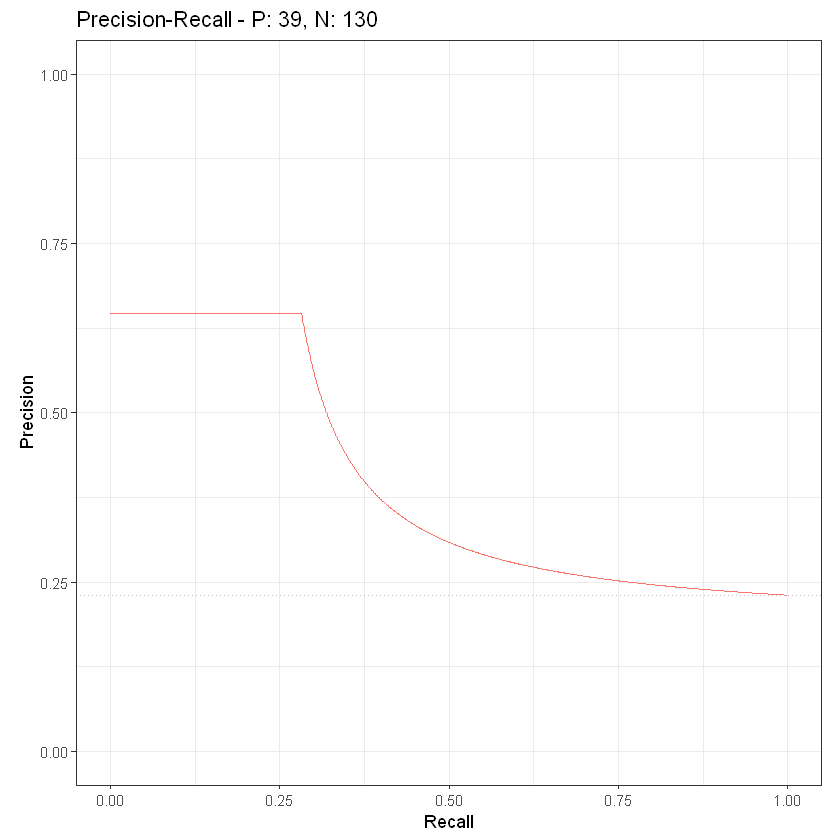

   Population   Gain Lift Score.Point
1          10  64.71 6.47           2
2          20  64.71 3.24           2
3          30 100.00 3.33           1
4          40 100.00 2.50           1
5          50 100.00 2.00           1
6          60 100.00 1.67           1
7          70 100.00 1.43           1
8          80 100.00 1.25           1
9          90 100.00 1.11           1
10        100 100.00 1.00           1


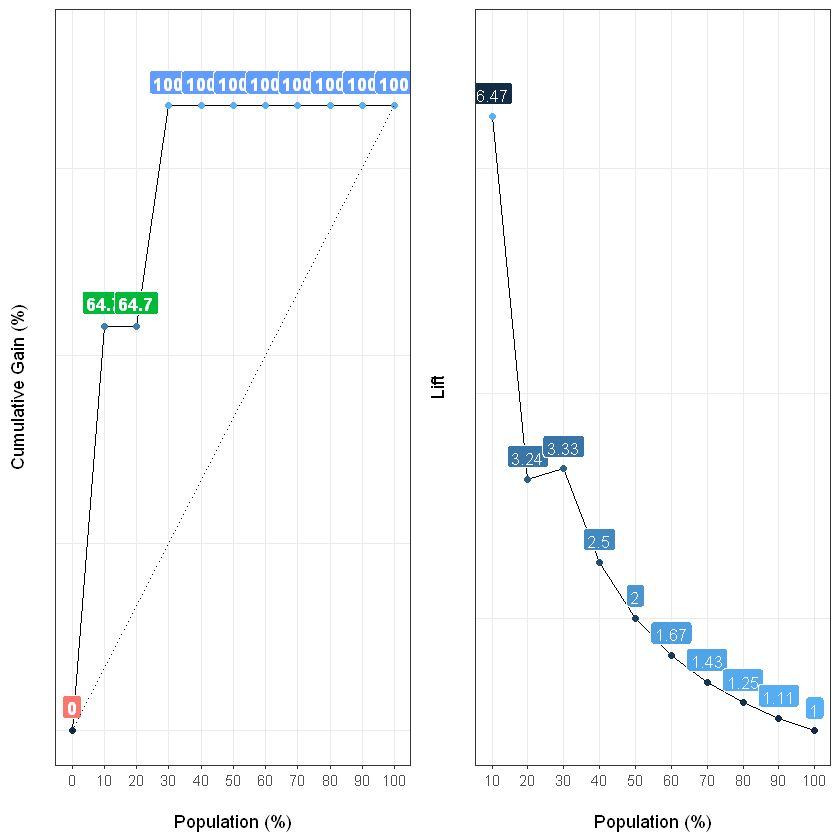

In [18]:
################### Logistic Regression #####################

# Logistic regresion.family = "binomial" means only two choices available i.e. yes or no.
# if we've let say three choices say rich,poor,medium then family = "multinomial".

# B-converting of variables is necessary so as to get different results for each sub-category. 
# cnames=c("profession","marital","schooling","default","contact","month","poutcome")
train_sample = train
test_sample = test

# for(i in cnames)
# {
#   train[,i] = as.factor(train[,i])
#   test[,i] = as.factor(test[,i])
  
# }
LR_model = glm(formula = default ~ . , data = train , family = "binomial")

# summary of the model.
# summary(LR_model)
# A-to check performance of the model check the difference betweem null deviance and residual deviance,
# if it is high then it means a good model else not.

# predict using logistic regression.
# B - type = "response" will give probabilities.
LR_Predictions = predict(LR_model, newdata = test, type = "response")

# Convert probabilities.
LR_Predictions = ifelse(LR_Predictions > 0.5, 1 , 0)

## Evaluate the performance of the classification model.
ConfMatrix_LR = table(test$default, LR_Predictions)

cm=confusionMatrix(ConfMatrix_LR)
# Evaluating the performance of or model, by making a contingency table. The(1,1) represent True negative.
#(2,1)-False negative; all of this depends upon the target variable,here 1 implies negative and 2 implies +ve.

# cm
ConfMatrix_LR

TN=ConfMatrix_LR[1,1]
FP=ConfMatrix_LR[1,2]
FN=ConfMatrix_LR[2,1]
TP=ConfMatrix_LR[2,2]

# Accuracy
AC = (TP + TN)/(TP + TN + FN + FP)
cat("Accuracy from Logistic Regression Model     ",AC*100)
# Recall
FNR = TP/(FN + TP) 
cat("\nRecall from Logistic Regression Model       ",FNR*100)


########################## PR ##########################

library(precrec)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
LR_pr = evalmod(scores = as.numeric(LR_Predictions), labels = as.numeric(test$default))
# au0sc = as.data.frame(XGB_pr)
aucs<-auc(LR_pr)
print("^-^")   
aucs
autoplot(LR_pr, "PRC", color=c("yellow"),add=TRUE, lwd = 10 ,auc.main = FALSE) 
paste("Area under PR-curve of Logistic Regression Model: ", aucs[2,'aucs'])

######################## ROC ############################

detach("package:precrec", unload=TRUE)
library(pROC)
LR_roc=roc(as.numeric(test$default), as.numeric(LR_Predictions))
LR_roc_auc=auc(LR_roc)
# LR_roc_auc = aucs[1,'aucs']

######################## GL ##############################

library(funModeling)
df=data.frame(actual=as.numeric(test$default), predicted=as.numeric(LR_Predictions))
gain_lift(data=df, score='actual', target='predicted')
# str(df)

## For input data

In [19]:
# B - type = "response" will give probabilities.
LR_Predictions = predict(LR_model, newdata = input_data, type = "response")

LR_Predictions = ifelse(LR_Predictions > 0.5, 1 , 0)
cat("Default value from Logistic Regression for input data is:",LR_Predictions)

Default value from Logistic Regression for input data is: 0

In [20]:
str(test$default)
str(LR_Predictions)
test$default
LR_Predictions

 Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 2 1 ...
 Named num 0
 - attr(*, "names")= chr "851"


[1] 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 [38] 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 [75] 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
Levels: 0 1

851 
  0

# Decision Tree Classification

   DT_Predictions
      0   1
  0 106  11
  1  28   7

Accuracy from DT Model      74.34211
Recall from DT Model        20


Attaching package: 'precrec'


The following object is masked from 'package:pROC':

    auc




[1] "^-^"
Area under PR-curve of Decision Tree Model is 0.2861959

Setting levels: control = 1, case = 2

Setting direction: controls < cases



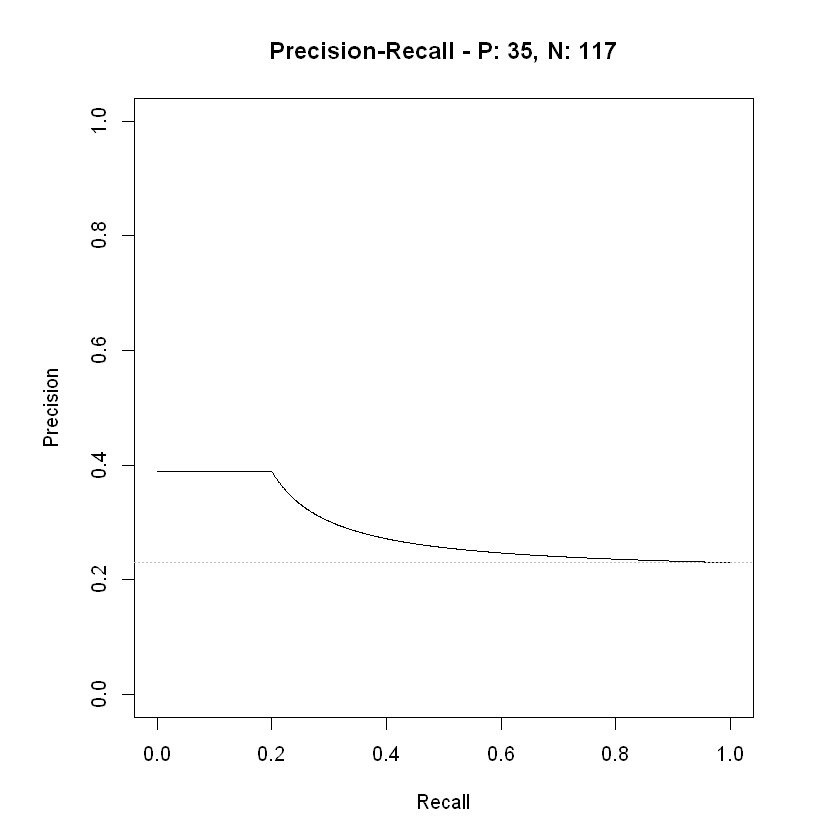

   Population   Gain Lift Score.Point
1          10  38.89 3.89           2
2          20  38.89 1.94           2
3          30 100.00 3.33           1
4          40 100.00 2.50           1
5          50 100.00 2.00           1
6          60 100.00 1.67           1
7          70 100.00 1.43           1
8          80 100.00 1.25           1
9          90 100.00 1.11           1
10        100 100.00 1.00           1


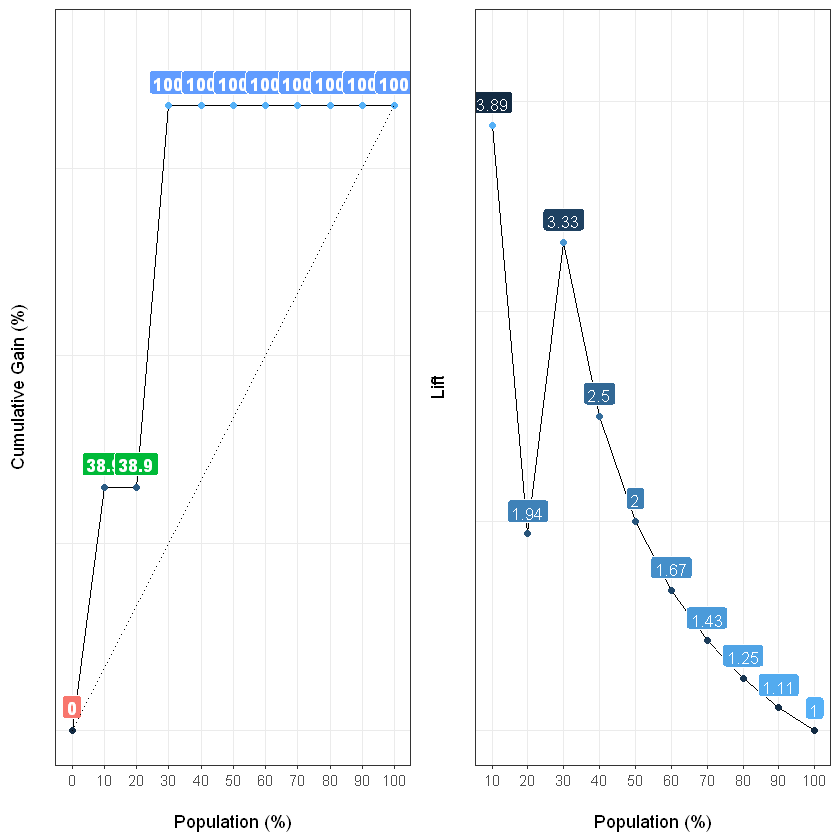

In [21]:

# Data divided in train and test.
set.seed(1234)
train.index = createDataPartition(bld$default, p = .82, list = FALSE)
# Above- list= false(we don't want repetitive observations in the training data,
# responded =0.80(80% of observations in marketing_train),the func createData... will return indexes of the observations)
train = bld[train.index,]
test = bld[-train.index,]


# Decision tree for classification
# Develop model on training data.
DT_model = C5.0(default ~.,train, trials = 100, rules = TRUE)
# Above- '.'means remaining all are independent variables.it could have been like 
# C5.0(responded ~ profession + campaign),trials = 100 means built 100 dec..trees and select the best one from it,
# rules = TRUE, means extract buiseness rules from decision trees.
# summary(C50_model)


write(capture.output(summary(DT_model)),"c50Rules_bld.txt")
# Above-Write rules of the model into disk.

DT_Predictions = predict(DT_model, test[,-length(names(bld))], type= "class",)
# Above-Lets predict for test cases, by removing the last variable(i.e default)
# we can also write type = "prob" for probability.

ConfMatrix_DT = table(test$default,DT_Predictions)
cm=confusionMatrix(ConfMatrix_DT)
# Evaluating the performance of or model, by making a contingency table. The(1,1) represent True negative.
#(2,1)-False negative; all of this depends upon the target variable,here 1 implies negative and 2 implies +ve.

# cm
ConfMatrix_DT

TN=ConfMatrix_DT[1,1]
FP=ConfMatrix_DT[1,2]
FN=ConfMatrix_DT[2,1]
TP=ConfMatrix_DT[2,2]

# Accuracy
AC = (TP + TN)/(TP + TN + FN + FP)
cat("Accuracy from DT Model     ",AC*100)
# Recall.
Recall = TP/(FN + TP) 
cat("\nRecall from DT Model       ",Recall*100)


########################## PR ##########################

library(precrec)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
DT_pr = evalmod(scores = as.numeric(DT_Predictions), labels = as.numeric(test$default))
aucs<-auc(DT_pr)
print("^-^")   
# aucs
plot(DT_pr, "PRC", color=c("yellow"),add=TRUE  ,auc.main = FALSE) 
cat("Area under PR-curve of Decision Tree Model is",aucs[2,'aucs'])

######################## ROC ############################

detach("package:precrec", unload=TRUE)
library(pROC)
DT_roc=roc(as.numeric(test$default), as.numeric(DT_Predictions))
DT_roc_auc=auc(DT_roc)
# DT_roc_auc = aucs[1,'aucs']
# DT_roc_auc



# library(pROC)
# RF_roc <- roc(as.numeric(test$default), as.numeric(RF_Predictions))
# # Area Under Curve (AUC) for each ROC curve (higher -> better)
# # RF_auc <- auc(RF_roc)
# RF_roc_auc = aucs[1,'aucs']
# # # plot ROC curves
# # plot(RF_roc, col = "green", main = "ROC For Random Forest (GREEN)")
# plot(RF_pr, "ROC", col=c("blue"), lwd=10) 

# # AUC
# paste("Area under ROC-curve of random forest: ", RF_roc_auc)

########################## GL #############################

library(funModeling)
df=data.frame(actual=as.numeric(test$default), predicted=as.numeric(DT_Predictions))
gain_lift(data=df, score='actual', target='predicted')


## For input data

In [22]:
DT_Predictions = predict(DT_model, input_data[,-length(names(input_data))], type= "prob")

DT_Predictions = ifelse(LR_Predictions > 0.5, 1 , 0)
cat("Default value from Logistic Regression for input data is:",DT_Predictions)

Default value from Logistic Regression for input data is: 0

# Random Forest Model

In [23]:
# head(temp_df)

3961 rules (length<=6) were extracted from the first 100 trees.
Accuracy from RF Model      78.28947
Recall from RF Model        28.57143


Attaching package: 'precrec'


The following object is masked from 'package:pROC':

    auc




Area under PR-Curve of Random Forest model : 0.3675275

Setting levels: control = 0, case = 1

Setting direction: controls < cases



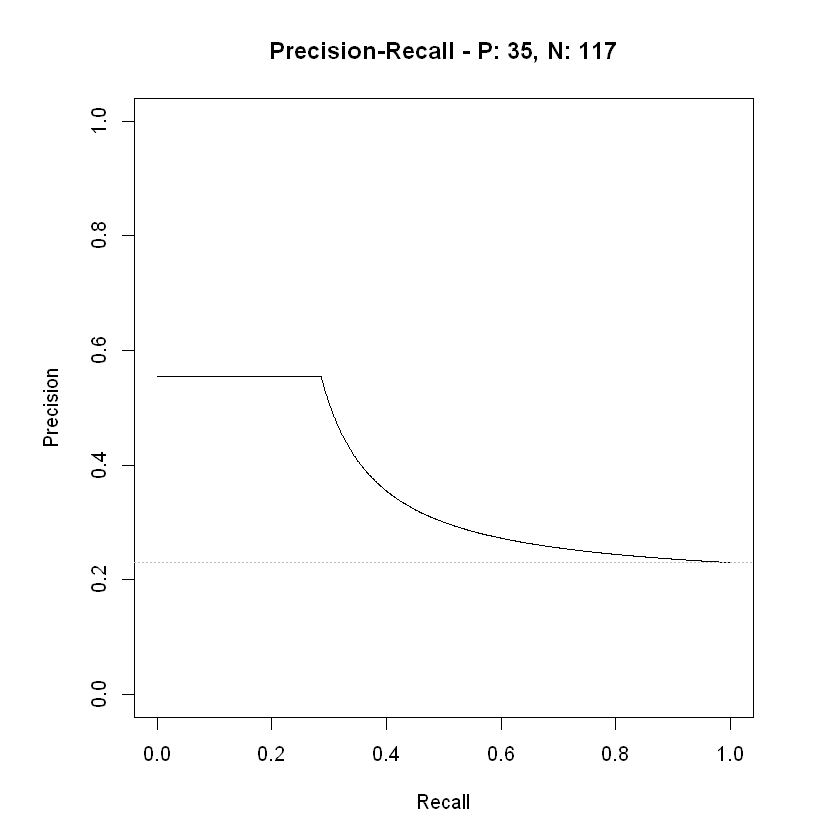

   Population   Gain Lift Score.Point
1          10  55.56 5.56           2
2          20  55.56 2.78           2
3          30 100.00 3.33           1
4          40 100.00 2.50           1
5          50 100.00 2.00           1
6          60 100.00 1.67           1
7          70 100.00 1.43           1
8          80 100.00 1.25           1
9          90 100.00 1.11           1
10        100 100.00 1.00           1


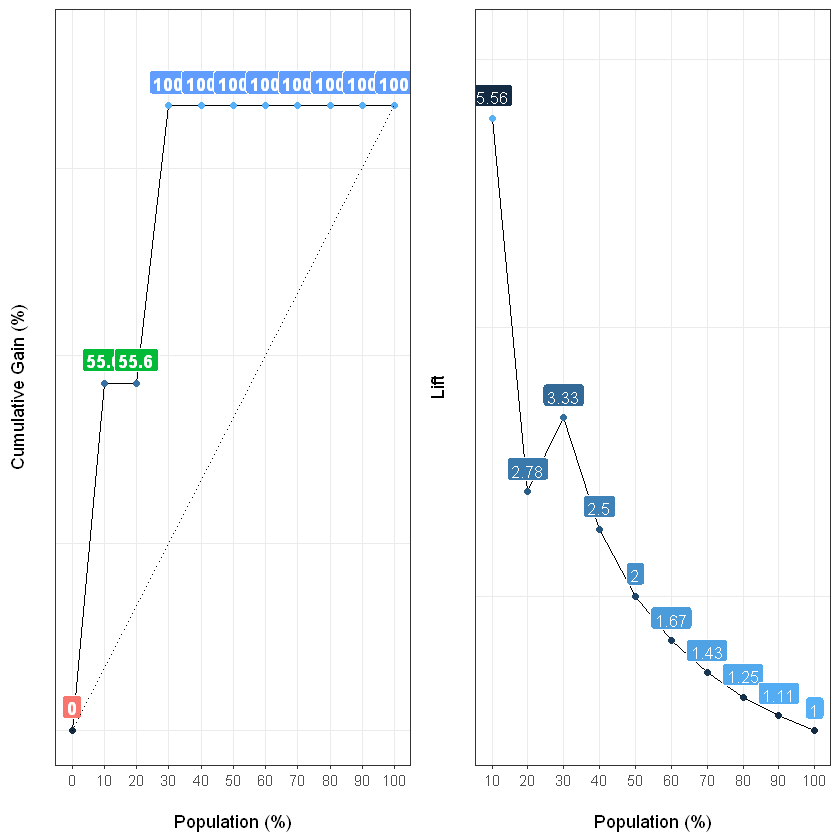

In [24]:
# B - Calculating the important variables(that give useful data).We can also give more arguments to improve our model.
RF_model = randomForest(default ~ .,train ,importance = TRUE, ntree = 490 )
 
#--- 
## Extract rules from random forest.
## transform 'RF_model' object to an intrees format.

treeList = RF2List(RF_model)
 
## Extract rules
## B- excluding the 17th variable.
exec = extractRules(treeList, train[,-length(names(bld))])

## visualize  some rules.
# exec[1:2,]

## Make rules more readable.
readableRules = presentRules(exec,colnames(train))
# readableRules[1:2,]

## Get rule metrics.
ruleMetric = getRuleMetric(exec, train[,-length(names(bld))], train$default)

## Evaluate few rules.
## len - no. of columns in every rule, freq - occurence of a rule in the dataset, err- how many rows denied the rule(just multiply by 100 for %)
# ruleMetric[1:2,]


RF_Predictions = predict(RF_model, test)

# RF_Predictions[,2]=ifelse(RF_Predictions[,2]>0.5 ,1,0)
ConfMatrix_RF = table(test$default,RF_Predictions)
cm=confusionMatrix(ConfMatrix_RF)
# Evaluating the performance of or model, by making a contingency table. The(1,1) represent True negative.
#(2,1)-False negative; all of this depends upon the target variable,here 1 implies negative and 2 implies +ve.

# cm
# ConfMatrix_C50

# TN=ConfMatrix_RF[1,1]
# FP=ConfMatrix_RF[1,2]
# FN=ConfMatrix_RF[2,1]
# TP=ConfMatrix_RF[2,2]

TN=ConfMatrix_RF[1,1]
FP=ConfMatrix_RF[1,2]
FN=ConfMatrix_RF[2,1]
TP=ConfMatrix_RF[2,2]

# Accuracy
AC = (TP + TN)/(TP + TN + FN + FP)
cat("Accuracy from RF Model     ",AC*100)
# Recall.
Recall = TP/(FN + TP) 
cat("\nRecall from RF Model       ",Recall*100)

########################## PR ###########################

library(precrec)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
RF_pr = evalmod(scores = as.numeric(RF_Predictions), labels = as.numeric(test$default))
# au0sc = as.data.frame(XGB_pr)
aucs<-auc(RF_pr)
# print("^-^")   
# aucs
plot(RF_pr, "PRC", color=c("yellow"),add=TRUE, lwd = 10 ,auc.main = FALSE) 
cat("Area under PR-Curve of Random Forest model :",aucs[2,'aucs'])     

######################### ROC ######################### 

detach("package:precrec", unload=TRUE)
library(pROC)
RF_roc = roc(as.ordered(test$default), as.ordered(RF_Predictions))
RF_roc_auc = auc(RF_roc)
# RF_roc_auc

########################## GL ###############################

library(funModeling)
df=data.frame(actual=as.numeric(test$default), predicted=as.numeric(RF_Predictions))
gain_lift(data=df, score='actual', target='predicted')



 ## For input data

In [25]:
RF_Predictions = predict(RF_model, input_data)
RF_Predictions = ifelse(as.numeric(RF_Predictions) == 2, 1 , 0)
cat("Default value from Logistic Regression for input data is:",RF_Predictions)

Default value from Logistic Regression for input data is: 1

# KNN Model

               
KNN_Predictions   0   1
              0 127   8
              1   3  31

Accuracy from KNN Model      93.49112
Recall from KNN Model        91.17647[1] "^-^"


modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
m1,1,ROC,0.8858974
m1,1,PRC,0.8075158


Area under PR-Curve of KNN Model : 0.8075158

Setting levels: control = 0, case = 1

Setting direction: controls < cases



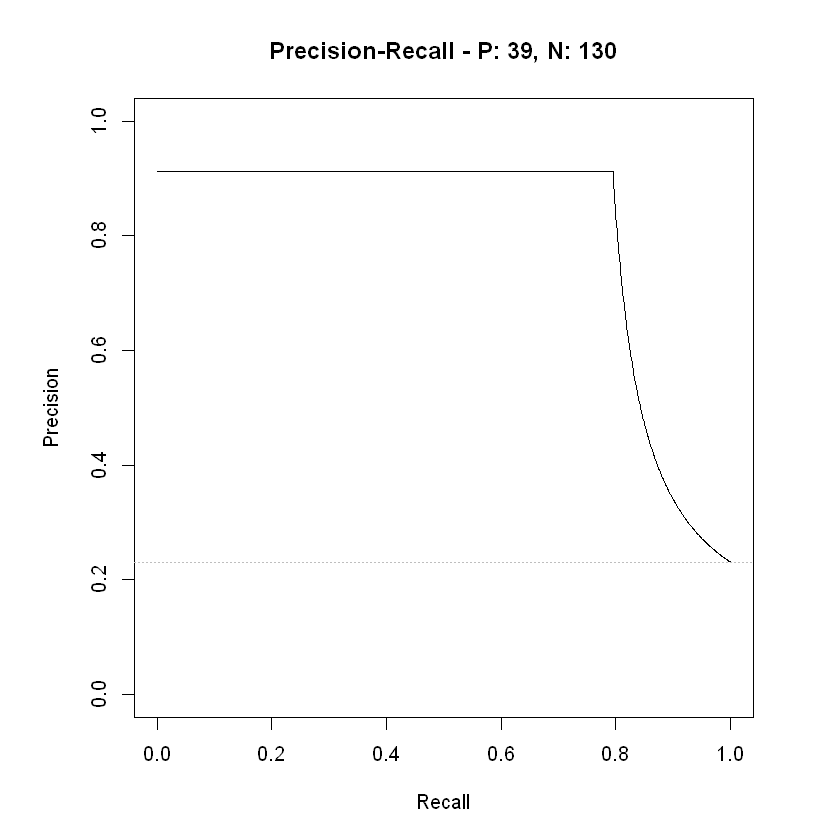

   Population   Gain Lift Score.Point
1          10  91.18 9.12           2
2          20  91.18 4.56           2
3          30 100.00 3.33           1
4          40 100.00 2.50           1
5          50 100.00 2.00           1
6          60 100.00 1.67           1
7          70 100.00 1.43           1
8          80 100.00 1.25           1
9          90 100.00 1.11           1
10        100 100.00 1.00           1


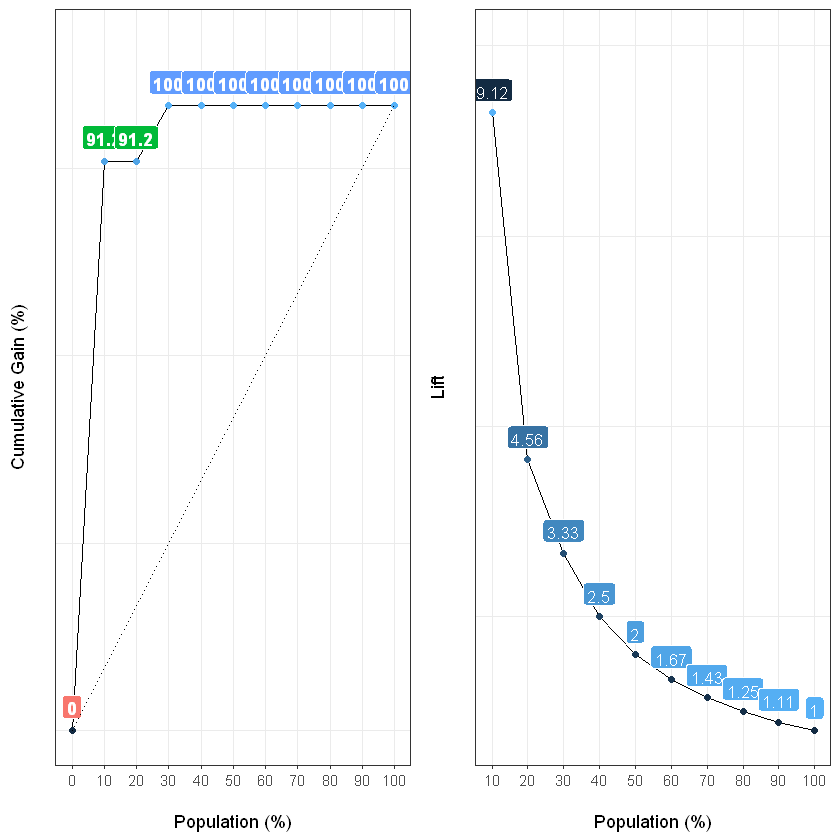

In [26]:
########################### KNN Algorithm ##################################

library(class)


# Dividing data into train and test using stratified sampling method.(Since, our target variable "default" is binary classification.(Yes or no)).

# library(DataCombine)
# set.seed(1234)

set.seed(1234)
train.index = createDataPartition(bld$default, p = .80, list = FALSE)
# Above- list= false(we don't want repetitive observations in the training data,
# responded =0.80(80% of observations in marketing_train),the func createData... will return indexes of the observations)
train = bld[train.index,]
test = bld[-train.index,]
# str(train)
# str(test)
# bld


# Predict test data
KNN_Predictions = knn(train[, 1:length(names(bld))],test[, 1:length(names(bld))], train$default, k=2)

# Confusion matrix
confMatrix_KNN = table(KNN_Predictions, test$default)
cm=confusionMatrix(confMatrix_KNN)
# Evaluating the performance of or model, by making a contingency table. The(1,1) represent True negative.
#(2,1)-False negative; all of this depends upon the target variable,here 1 implies negative and 2 implies +ve.

# cm
confMatrix_KNN

TN=confMatrix_KNN[1,1]
FP=confMatrix_KNN[1,2]
FN=confMatrix_KNN[2,1]
TP=confMatrix_KNN[2,2]

# Accuracy
AC = (TP + TN)/(TP + TN + FN + FP)
cat("Accuracy from KNN Model     ",AC*100)
# Recall.
Recall = TP/(FN + TP) 
cat("\nRecall from KNN Model       ",Recall*100)


###################### PR ########################

   #-----------------------1----Ye vala appy karna hai ^-^-----------------                       
                            
library(precrec,warn.conflicts = FALSE)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
KNN_pr = evalmod(scores = as.numeric(KNN_Predictions), labels = as.numeric(test$default))
aucs<-auc(KNN_pr)
print("^-^")   
aucs
plot(KNN_pr, "PRC", color=c("yellow"),add=TRUE, lwd = 10 ,auc.main = FALSE) 
cat("Area under PR-Curve of KNN Model :",aucs[2,'aucs'])
#-----------------------2--------------------
     

# library(PRROC)                            
# b=pr.curve(scores.class0 =as.numeric(test$default),scores.class1=as.numeric(KNN_Predictions),curve = TRUE ) 

# plot(b,main="PR Curve for NB Model",color="orange")                  
# rm

  #----------------------------------------------

##################### ROC ########################

detach("package:precrec", unload=TRUE)
library(pROC)
KNN_roc = pROC::roc(as.ordered(test$default), as.ordered(KNN_Predictions))
KNN_roc_auc = auc(KNN_roc)
# KNN_roc_auc = aucs[1,'aucs']
# KNN_roc_auc

########################## GL ###############################

library(funModeling)
df=data.frame(actual=as.numeric(test$default), predicted=as.numeric(KNN_Predictions))
gain_lift(data=df, score='actual', target='predicted')


## For input data

In [27]:
# Predict test data
KNN_Predictions = knn(train[, 1:length(names(bld))],input_data[, 1:length(names(bld))], train$default, k=2)

KNN_Predictions = ifelse(as.numeric(KNN_Predictions) == 2, 1, 0)
cat("Default value from KNN Model for input data is:", KNN_Predictions)

Default value from KNN Model for input data is: 1

# Naive Bayes

        predicted
observed   0   1
       0 122   8
       1  25  14

Accuracy from NB Model      80.47337
Recall from NB Model        35.89744
Area under PR-Curve of NB Model : 0.4286637

Setting levels: control = 0, case = 1

Setting direction: controls < cases



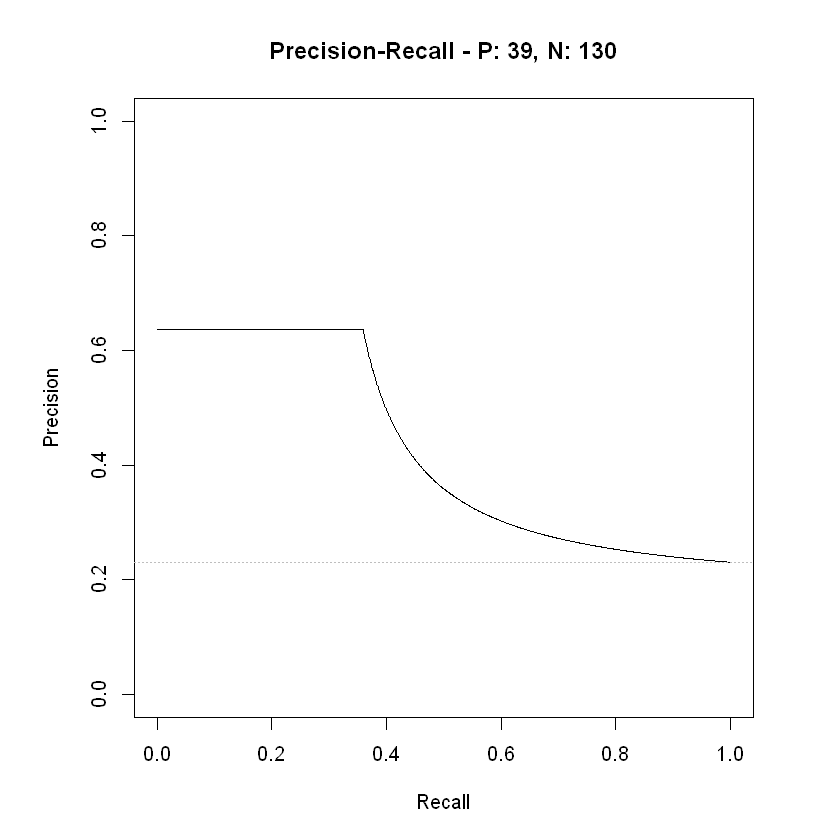

   Population   Gain Lift Score.Point
1          10  63.64 6.36           2
2          20  63.64 3.18           2
3          30 100.00 3.33           1
4          40 100.00 2.50           1
5          50 100.00 2.00           1
6          60 100.00 1.67           1
7          70 100.00 1.43           1
8          80 100.00 1.25           1
9          90 100.00 1.11           1
10        100 100.00 1.00           1


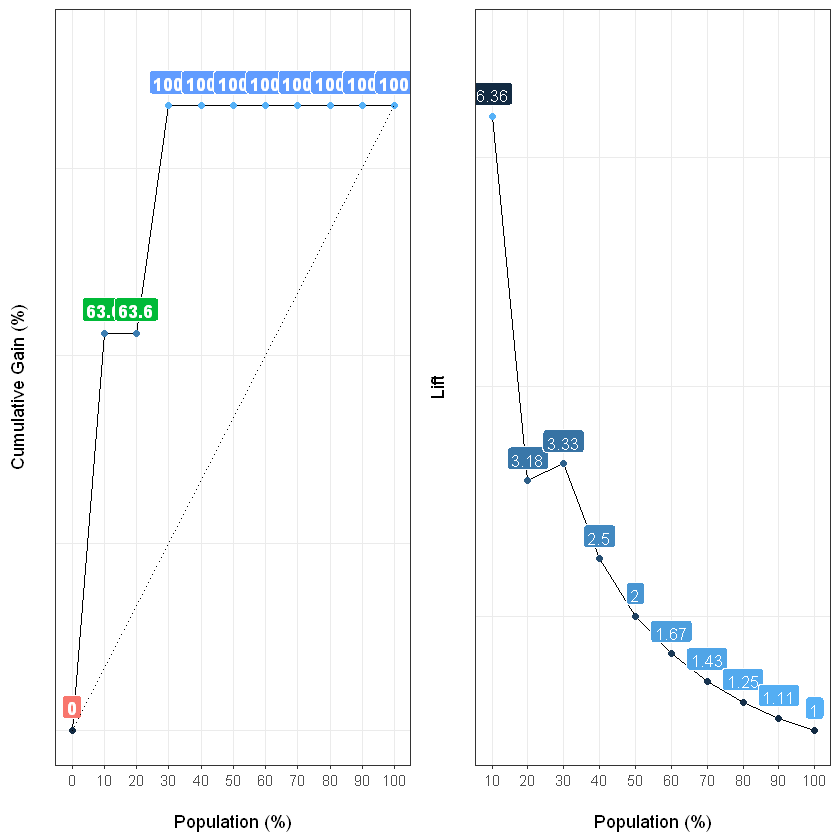

In [28]:

# Naive bayes
# library(e1071)
# Developing model,using the train data.
NB_model = naiveBayes(default ~ . , data=train)

# predict on test cases, we can also use type = raw for exact probabilities.
NB_Predictions = predict(NB_model, test[,1:length(names(bld))], type = 'class')

# length(NB_Predictions)
# Look at confusion matrix.
confMatrix_NB = table(observed = test[,length(names(bld))], predicted = NB_Predictions)
cm=confusionMatrix(confMatrix_NB)

confMatrix_NB

TN=confMatrix_NB[1,1]
FP=confMatrix_NB[1,2]
FN=confMatrix_NB[2,1]
TP=confMatrix_NB[2,2]

# Accuracy
AC = (TP + TN)/(TP + TN + FN + FP)
cat("Accuracy from NB Model     ",AC*100)
# Recall.
Recall = TP/(FN + TP) 
cat("\nRecall from NB Model       ",Recall*100)

#################### PR ########################

library(precrec,warn.conflicts = FALSE)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
NB_pr = evalmod(scores = as.numeric(NB_Predictions), labels = as.numeric(test$default))
aucs<-auc(NB_pr)
# print("^-^")   
# aucs
plot(NB_pr, "PRC", color=c("yellow"),add=TRUE, lwd = 10 ,auc.main = FALSE) 
cat("\nArea under PR-Curve of NB Model :",aucs[2,'aucs'])


##################### ROC #######################

detach("package:precrec", unload=TRUE)
library(pROC)
NB_roc = pROC::roc(as.ordered(test$default), as.ordered(NB_Predictions))
NB_roc_auc = auc(NB_roc)

###################### Gain/Lift charts ###################

library(funModeling)
df=data.frame(actual=as.numeric(test$default), predicted=as.numeric(NB_Predictions))
gain_lift(data=df, score='actual', target='predicted',)
# str(df)LR_Predictions_GL

## For input data

In [29]:
NB_Predictions = predict(NB_model, input_data[,1:length(names(input_data))], type = 'class')

NB_Predictions = ifelse(as.numeric(NB_Predictions) == 1, 1, 0)
cat("Default value from Naive Bayes Model for input data is:", (NB_Predictions))


Default value from Naive Bayes Model for input data is: 1

# XG Boosting Model

[1] "Final Accuracy = 79.34"
Recall 44.83

modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
m1,1,ROC,0.6120250
m1,1,PRC,0.3096107



Area under PR-Curve of XGB Model : 0.3096107

Setting levels: control = 0, case = 1

Setting direction: controls < cases



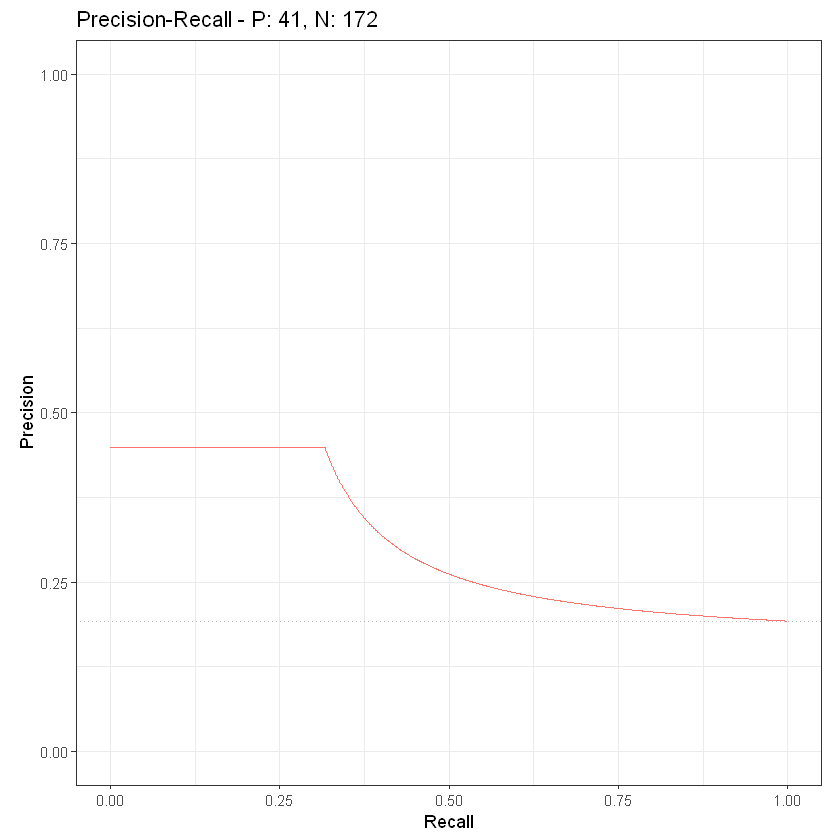

   Population   Gain Lift Score.Point
1          10  44.83 4.48           1
2          20 100.00 5.00           0
3          30 100.00 3.33           0
4          40 100.00 2.50           0
5          50 100.00 2.00           0
6          60 100.00 1.67           0
7          70 100.00 1.43           0
8          80 100.00 1.25           0
9          90 100.00 1.11           0
10        100 100.00 1.00           0


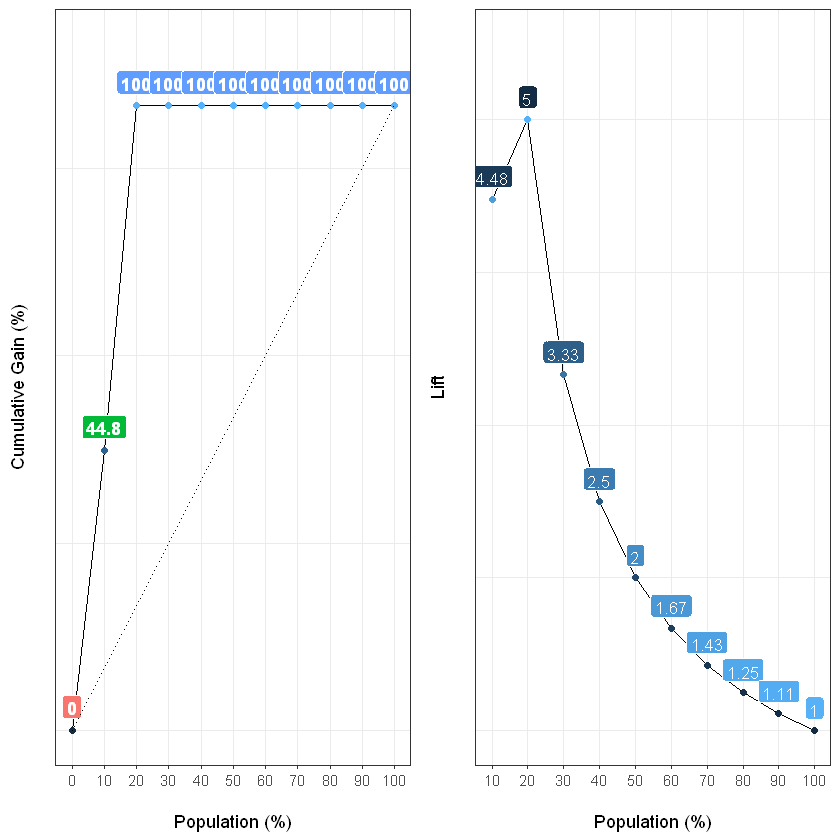

In [30]:
##################### XG Boosting Algorithm ######################

library(xgboost)

xg_bld=bld
xg_bld$ed=as.numeric(xg_bld$ed)
default = xg_bld$default
label = as.integer(xg_bld$default)-1
xg_bld$default = NULL

# Convert the Species factor to an integer class starting at 0
# This is picky, but it's a requirement for XGBoost

n = nrow(xg_bld)
train.index = sample(n,floor(0.75*n))
train.data = as.matrix(xg_bld[train.index,])
train.label = label[train.index]
test.data = as.matrix(xg_bld[-train.index,])
test.label = label[-train.index]
# str(train.data)
# str(test.data)

# Transform the two data sets into xgb.Matrix
xgb.train = xgb.DMatrix(data=train.data,label=train.label)
xgb.test = xgb.DMatrix(data=test.data,label=test.label)


num_class = length(levels(default))
params = list(
  booster="gbtree",
  eta=0.001,
  max_depth=5,
  gamma=2,
  subsample=0.75,
  colsample_bytree=1,
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)




xgb.fit=xgb.train(
  params=params,
  data=xgb.train,
  nrounds=1000,
  nthreads=1,
  early_stopping_rounds=10,
  watchlist=list(val1=xgb.train,val2=xgb.test),
  verbose=0
)




# Review the final model and results
# xgb.fit
xgb.pred = predict(xgb.fit,test.data,reshape=T)
xgb.pred = as.data.frame(xgb.pred)
colnames(xgb.pred) = levels(default)




# Use the predicted label with the highest probability
xgb.pred$prediction = apply(xgb.pred,1,function(x) colnames(xgb.pred)[which.max(x)])
xgb.pred$label = levels(default)[test.label+1]

# Calculate the final accuracy
result = sum(xgb.pred$prediction==xgb.pred$label)/nrow(xgb.pred)                           
print(paste("Final Accuracy =",round(100*result, digits = 2)))  

TP=0
FN=0
for (x in (1:length(xgb.pred$label)))
{
    if(xgb.pred$label[x] == '1' & xgb.pred$prediction[x] == '1')
    {
      TP = TP + 1   
    }
    if(xgb.pred$label[x] == '0' & xgb.pred$prediction[x] == '1')
    {
      FN = FN + 1   
    }   
}
# Recall
recall = TP/(TP + FN)
cat("Recall", round(100*recall, digits = 2))
                            
                              
#################### PR ########################

library(precrec,warn.conflicts = FALSE)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
XGB_pr = evalmod(scores = as.numeric(xgb.pred$prediction), labels = as.numeric(xgb.pred$label))
aucs<-auc(XGB_pr)

aucs
autoplot(XGB_pr, "PRC", color=c("yellow"),add=TRUE, lwd = 10) 
cat("\nArea under PR-Curve of XGB Model :",aucs[2,'aucs'])


############# ROC #####################

detach("package:precrec", unload=TRUE)                            
library(pROC)
XGB_roc=pROC::roc(as.ordered(xgb.pred$label),as.ordered(xgb.pred$prediction))
XGB_roc_auc=auc(XGB_roc)

########################## GL ###############################

library(funModeling)
df=data.frame(actual=as.numeric(xgb.pred$label), predicted=as.numeric(xgb.pred$prediction))
gain_lift(data=df, score='actual', target='predicted')
                            
                            

## For input data

In [31]:
# xg_bld=bld
input_data_sample = input_data
input_data_sample$ed=as.numeric(input_data_sample$ed)
label = as.integer(input_data_sample$default)-1
input_data_sample$default = NULL

# Convert the default and ed factor to an integer class starting at 0
# This is picky, but it's a requirement for XGBoost

n = nrow(input_data_sample)
train.index = sample(n,floor(1*n))
input_data_sample = as.matrix(input_data_sample[train.index,])
input_data_sample.label = label[train.index]

xgb.test = xgb.DMatrix(data=input_data_sample, label=input_data_sample.label)
xgb.pred = predict(xgb.fit, input_data_sample, reshape=T)
# as.integer(xgb.pred)
# xgb.pred[1]

xgb.pred = ifelse(as.numeric(xgb.pred[1]) >= 0.5, 1, 0)
cat("Default value from XGB Model for input data is:", xgb.pred[1])


Default value from XGB Model for input data is: 1

# Support Vector Machine Model 

        predicted
observed   0   1
       0 122   8
       1  25  14

Accuracy from SVM Model      80.47337
Recall from SVM Model        35.89744
Area under PR-Curve of SVM Model : 0.2441538

Setting levels: control = 0, case = 1

Setting direction: controls < cases



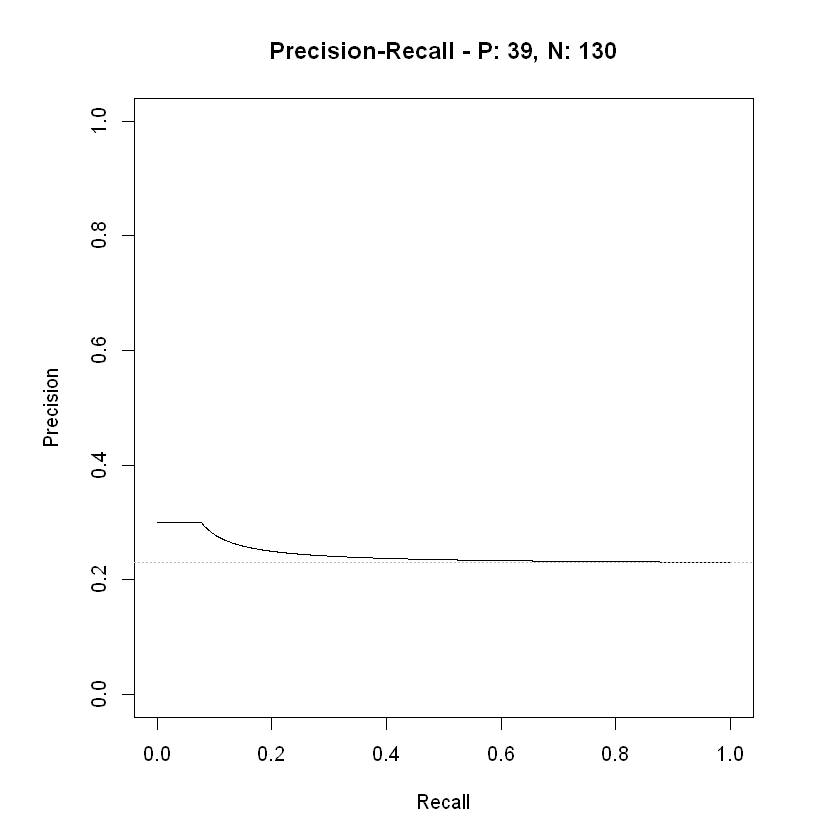

   Population Gain Lift Score.Point
1          10   30 3.00           2
2          20   30 1.50           2
3          30  100 3.33           1
4          40  100 2.50           1
5          50  100 2.00           1
6          60  100 1.67           1
7          70  100 1.43           1
8          80  100 1.25           1
9          90  100 1.11           1
10        100  100 1.00           1


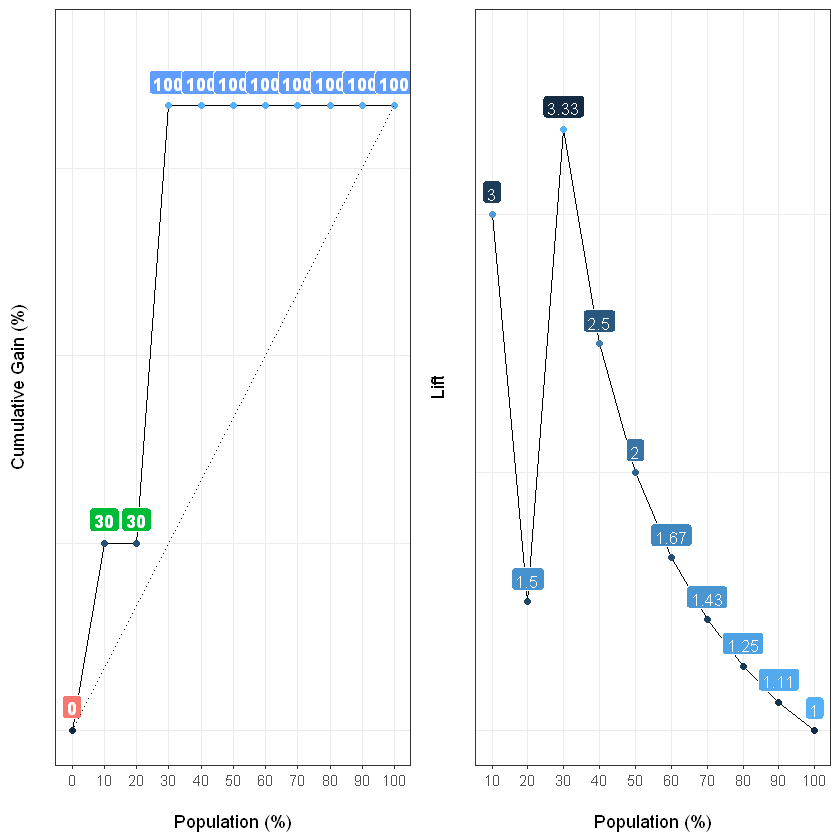

In [32]:
#Import Library
# require(e1071) #Contains the SVM 
library(e1071)
# Train <- read.csv(file.choose())
# Test <- read.csv(file.choose())
# there are various options associated with SVM training; like changing kernel, gamma and C value.

# create model
# SVM_model <- svm(default~., data=train, kernel='linear', C = 0.9,  gamma= 0.6)
SVM_model <- svm(default~., data=train, kernel = "radial", type = 'C-classification', gamma= 1.6)

#Predict Output
SVM_Predictions <- predict(SVM_model, test[,1:length(names(bld))])
# table(preds)
 
# Look at confusion matrix.
confMatrix_SVM = table(observed = test[,length(names(bld))], predicted = SVM_Predictions)
cm=confusionMatrix(confMatrix_SVM)

confMatrix_NB

TN=confMatrix_NB[1,1]
FP=confMatrix_NB[1,2]
FN=confMatrix_NB[2,1]
TP=confMatrix_NB[2,2]

# Accuracy
AC = (TP + TN)/(TP + TN + FN + FP)
cat("Accuracy from SVM Model     ",AC*100)
# Recall.
Recall = TP/(FN + TP) 
cat("\nRecall from SVM Model       ",Recall*100)

#################### PR ########################

library(precrec,warn.conflicts = FALSE)
library(ggplot2)  
# Calculate ROC and Precision-Recall curves
SVM_pr = evalmod(scores = as.numeric(SVM_Predictions), labels = as.numeric(test$default))
aucs<-auc(SVM_pr)
# print("^-^")   
# aucs
plot(SVM_pr, "PRC", color=c("yellow"),add=TRUE, lwd = 10 ,auc.main = FALSE) 
cat("\nArea under PR-Curve of SVM Model :",aucs[2,'aucs'])


##################### ROC #######################

detach("package:precrec", unload=TRUE)
library(pROC)
SVM_roc = pROC::roc(as.ordered(test$default), as.ordered(SVM_Predictions))
SVM_roc_auc = auc(SVM_roc)

###################### Gain/Lift charts ###################

library(funModeling)
df=data.frame(actual=as.numeric(test$default), predicted=as.numeric(SVM_Predictions))
gain_lift(data=df, score='actual', target='predicted',)



# ROC Curve

In [33]:
# # change the quality column to a 1 (if quality > 5) or a 0
# # df$quality <- ifelse(df$quality>5,1,0)
# # change the quality column to a factor type
# bld$default <- as.factor(bld$default)
# # split the dataframe into train and test sets
# # index <- sample(1:nrow(bld),size = 0.8*nrow(bld))
# # train <- bld[index,]
# # test <- bld[-index,]
# # build the random forest model and test it
# library(randomForest)
# rf_model <- randomForest(default ~., data = train,ntree = 1000,importance = FALSE)
# rf_prediction <- predict(rf_model, test, type = "prob")
# # build the logistic regression model and test it
# # lr_model <- glm(quality ~., data = train, family = "binomial")
# # lr_prediction <- predict(lr_model, test, type = "response")
# # ROC curves
# library(pROC)
# ROC_rf <- roc(test$default, rf_prediction[,2])
# # ROC_lr <- roc(test$default, lr_prediction)
# # Area Under Curve (AUC) for each ROC curve (higher -> better)
# ROC_rf_auc <- auc(ROC_rf)
# # ROC_lr_auc <- auc(ROC_lr)
# # plot ROC curves
# plot(ROC_rf, col = "green", main = "ROC For Random Forest (GREEN)")
# # lines(ROC_lr, col = "red")
# # print the performance of each model
# paste("Accuracy % of random forest: ", mean(test$default == round(rf_prediction[,2], digits = 0)))
# # paste("Accuracy % of logistic regression: ", mean(test$quality == round(lr_prediction, digits = 0)))
# paste("Area under curve of random forest: ", ROC_rf_auc)
# # paste("Area under curve of logistic regression: ", ROC_lr_auc)

# ROC Curve 

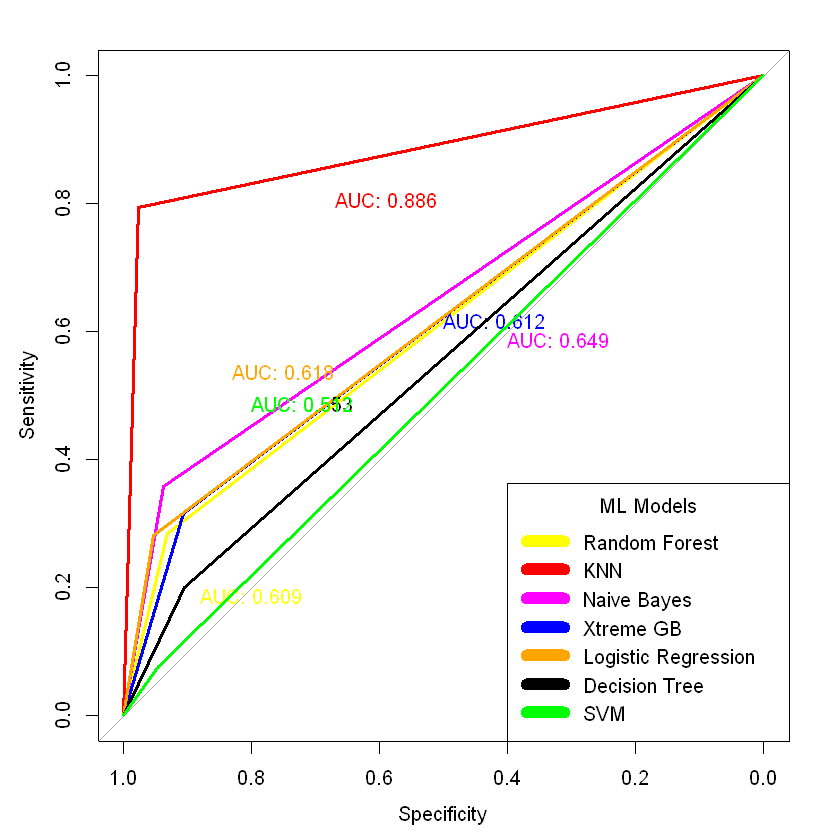

In [34]:
library(pROC)

plot.roc(RF_roc, col = "yellow",print.auc=TRUE, print.auc.x = 0.88, print.auc.y = 0.2, lwd = 3, lty = "solid")
plot.roc(KNN_roc, col = "red", add = TRUE, print.auc=TRUE, print.auc.x = 0.67, print.auc.y = 0.82, lwd = 3, lty = "solid")
plot.roc(NB_roc, col="magenta", add=TRUE, print.auc=TRUE, print.auc.x = 0.4,print.auc.y = 0.6, lwd = 3, lty = "solid")
plot.roc(XGB_roc, col="blue", add=TRUE, print.auc=TRUE, print.auc.x = 0.5,print.auc.y = 0.63, lwd = 3, lty = "solid")
plot.roc(LR_roc, col="orange", add=TRUE, print.auc=TRUE, print.auc.x = 0.83,print.auc.y = 0.55, lwd = 3, lty = "solid")
plot.roc(DT_roc, col="black", add=TRUE, print.auc=TRUE, print.auc.x = 0.80,print.auc.y = 0.50, lwd = 3, lty = "solid",)
plot.roc(SVM_roc, col="green", add=TRUE, print.auc=TRUE, print.auc.x = 0.80,print.auc.y = 0.50, lwd = 3, lty = "solid",)


legend("bottomright", legend=c("Random Forest", "KNN", "Naive Bayes","Xtreme GB", "Logistic Regression", "Decision Tree", "SVM"),
       col=c("yellow","red", "magenta","blue","orange","black","green"), lwd=10,title="ML Models")


In [35]:
# # plot.roc(RF_roc, col = "green", add = FALSE,print.auc=TRUE, print.auc.x = 0.6, print.auc.y = 0.24, lty = "solid", lwd=2.6)
# # plot.roc(KNN_roc, col = "red", add = TRUE,print.auc=TRUE, print.auc.x = 0.6, print.auc.y = 0.20, lty = "solid", lwd=2.6)
# plot.roc(RF_roc, col = "green", add = FALSE, lty = "solid", lwd=2.4)
# plot.roc(KNN_roc, col = "red", add = TRUE, lty = "solid", lwd=2.4)
# plot.roc(NB_roc, col="magenta", add=TRUE, lty = "solid", lwd=2.4)
# plot.roc(XGB_roc, col="blue", add=TRUE, lty = "solid", lwd=2.4)
# plot.roc(LR_roc, col="pink", add=TRUE, lty = "solid", lwd=2.4)
# plot.roc(DT_roc, col="black", add=TRUE, lty = "solid", lwd=2.4)

# legend("bottomright", legend=c("Random Forest", "KNN", "Naive Bayes","Xtreme GB", "Logistic Regression", "Decision Tree"),
#        col=c("green","red", "magenta","blue","pink","black"), lwd=10, title="ML Models")


# aucc <- c(RF_roc_auc,KNN_roc_auc, NB_roc_auc, XGB_roc_auc, LR_roc_auc, DT_roc_auc)
# aucc=ifelse(aucc>1 ,1,round(aucc,digits = 2))

# # legend=c(RF_auc, KNN_auc, NB_auc, XGB_auc, LR_auc, DT_auc)
# # library(stringr)
# # for(i in 1:6)
# # {
# #     aucc[[i]]=paste("AUC ", str_c(aucc[[i]]),sep=" ")
# # }    
# legend("topleft", legend=c( aucc[[1]], aucc[[2]], aucc[[3]], aucc[[4]], aucc[[5]], aucc[[6]]),
#        col=c("green","red", "magenta","blue","pink","black"), lwd=8, title="AUC Values")

# # aucc[[6]]